# Thesis Outcomes

In this notebook I will compare the result I got from all the algorithms I implemented. 

I will start by comparing both packing methods with each other. Then i will be comparing the Mean, followed by the Inner Product, and finish with the Variance.

For all the algorithms I am working with vector of size n = 8192 which are always filled with exactly 8192 values which can be 1, 2 or 3.

## Setup

In [2]:
# Imports
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Function to extract files from folder
def get_files(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
            files = glob.glob(os.path.join(root, '*.csv'))
            for f in files:
                    all_files.append(os.path.abspath(f))
    return all_files

In [64]:
# Get file names
outcomes_CSV = get_files("../timeCSVs")

# Import csv as a Dataframe
print(outcomes_CSV[0])
inner_Product_DF = pd.read_csv(outcomes_CSV[0])
print(outcomes_CSV[1])
mean_DF = pd.read_csv(outcomes_CSV[1])
print(outcomes_CSV[2])
variance_DF = pd.read_csv(outcomes_CSV[2])

c:\Users\berna\Desktop\Personal\FEUP\Thesis\Project\HE_Optimization\Outcomes\timeCSVs\innerProduct.csv
c:\Users\berna\Desktop\Personal\FEUP\Thesis\Project\HE_Optimization\Outcomes\timeCSVs\mean.csv
c:\Users\berna\Desktop\Personal\FEUP\Thesis\Project\HE_Optimization\Outcomes\timeCSVs\variance.csv


In [25]:
# Auxiliary Functions

def compare_two_types_by_percentage(column1, column2, df):
    return ((df.loc[df['Type'] == column2]['Average'].values[0] - df.loc[df['Type'] == column1]['Average'].values[0] )/ df.loc[df['Type'] == column2]['Average'].values[0]) * 100

def create_df_for_type(type, setup_averages, encryption_averages, homomorphic_averages):
    df = pd.DataFrame(columns=['Time'], index=['Setup', 'Encryption', 'Homomorphic'])

    df.loc['Setup'] = float(format(setup_averages[setup_averages['Type'] == type]['Average'].values[0], ".2f"))
    df.loc['Encryption'] = float(format(encryption_averages[encryption_averages['Type'] == type]['Average'].values[0], ".2f"))
    df.loc['Homomorphic'] = float(format(homomorphic_averages[homomorphic_averages['Type'] == type]['Average'].values[0], ".2f"))

    return df

## Inner Product

For the inner Product we only have one implementation per packing, this is because we are only going to use the method that gave us the best results for each packing in the mean implementation.

In [52]:
inner_Product_DF['type'].unique()

array(['optimized-slot', 'coef', 'coef-setup-reverse'], dtype=object)

In [66]:
### Create DF for each type of implementation
optimized_slot_DF = inner_Product_DF[inner_Product_DF['type'] == "optimized-slot"]
coef_DF = inner_Product_DF[inner_Product_DF['type'] == "coef"]
coef_setup_reverse_DF = inner_Product_DF[inner_Product_DF['type'] == "coef-setup-reverse"]

inner_product_implementation_dfs = {'coef': coef_DF,'optimized_slot': optimized_slot_DF, 'coef_setup_reverse': coef_setup_reverse_DF}

### Total Run Time

In [71]:
inner_product_total_time_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in inner_product_implementation_dfs.items():
    inner_product_total_time_averages.loc[len(inner_product_total_time_averages)] = {'Type': name, 'Average': df[' total'].mean()}

[Text(0, 0, '102.841'), Text(0, 0, '389.612'), Text(0, 0, '103.1')]

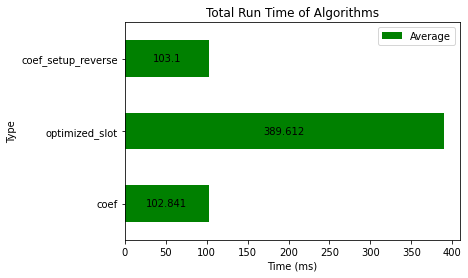

In [72]:
ax = inner_product_total_time_averages.plot.barh(x='Type', ylabel='Time (ms)', color='green', title='Total Run Time of Algorithms')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

In [73]:
# Compare Coefficient vs Optimized Slot
ip_coef_vs_optimized_slot = format(compare_two_types_by_percentage("coef", "optimized_slot", inner_product_total_time_averages),
                             ".2f")

# Compare impact of reversing a vector
ip_reverse_impact = format(compare_two_types_by_percentage("coef", "coef_setup_reverse", inner_product_total_time_averages),
                             ".2f")

### Time per phase

In [76]:
### Create a DataFrame for each phase with the average of each type of algorithm

# Setup
ip_setup_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in inner_product_implementation_dfs.items():
    ip_setup_averages.loc[len(ip_setup_averages)] = {'Type': name, 'Average': df[' setup'].mean()}

# Encryption
ip_encryption_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in inner_product_implementation_dfs.items():
    ip_encryption_averages.loc[len(ip_encryption_averages)] = {'Type': name, 'Average': df[' encryption'].mean()}

# Homomorphic
ip_homomorphic_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in inner_product_implementation_dfs.items():
    ip_homomorphic_averages.loc[len(ip_homomorphic_averages)] = {'Type': name, 'Average': df[' homomorphic'].mean()}

[Text(0, 0, '16.889'), Text(0, 0, '87.872'), Text(0, 0, '16.936')]

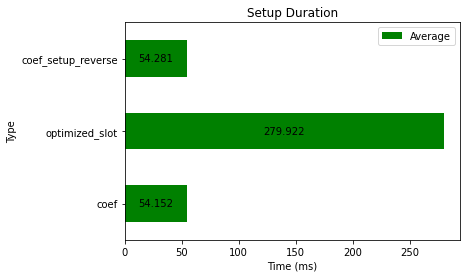

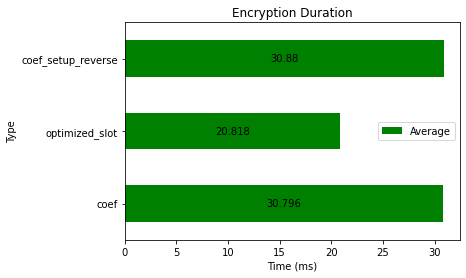

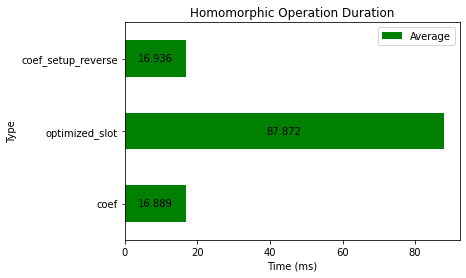

In [77]:
### Plot a graph for each phase

# Setup
ax = ip_setup_averages.plot.barh(x='Type', color='green', title='Setup Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

# Encryption
ax = ip_encryption_averages.plot.barh(x='Type', color='green', title='Encryption Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

# Homomorphic
# Needs two graphs because the values ara in a huge range
ax = ip_homomorphic_averages.plot.barh(x='Type', ylabel='Time (ms)', color='green', title='Homomorphic Operation Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')